# LEAD SCORE CASE STUDY

# Import Library

In [1]:
# import all Importent library for this model
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np, pandas as pd

# Import Dataset

In [3]:
# load csv file of dataset
df = pd.read_csv('Leads.csv')

In [4]:
# check the dataset head
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
# check the info of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# make all data in uppercase
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

In [8]:
# delete dublicate row
df = df.drop_duplicates()

In [9]:
df.shape

(9240, 37)

We can see that in so many column their is a null value present. so now we count the null value.

# Cleaning the Dataset (null Value and irrelevant column)

In [10]:
# check the null value
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Lets find null value in percentage form

In [11]:
round(df.isna().mean()*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
df['Country'].value_counts()

Country
INDIA                   6492
UNITED STATES             69
UNITED ARAB EMIRATES      53
SINGAPORE                 24
SAUDI ARABIA              21
UNITED KINGDOM            15
AUSTRALIA                 13
QATAR                     10
HONG KONG                  7
BAHRAIN                    7
OMAN                       6
FRANCE                     6
UNKNOWN                    5
SOUTH AFRICA               4
NIGERIA                    4
GERMANY                    4
KUWAIT                     4
CANADA                     4
SWEDEN                     3
CHINA                      2
ASIA/PACIFIC REGION        2
UGANDA                     2
BANGLADESH                 2
ITALY                      2
BELGIUM                    2
NETHERLANDS                2
GHANA                      2
PHILIPPINES                2
RUSSIA                     1
SWITZERLAND                1
VIETNAM                    1
DENMARK                    1
TANZANIA                   1
LIBERIA                    1
MALAYS

In [13]:
# find all column name with null value
columns_with_null = df.columns[df.isnull().any()]

In [14]:
columns_with_null

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [15]:
# here we drop the column where their is the null value percentage of  column is <=30 % 
df_1 = df.drop(['What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'], axis=1)

In [16]:
# Now again Check the null Value 
df_1.isnull().mean()*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Country                                     26.634199
Specialization                              15.562771
How did you hear about X Education          23.885281
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

In [17]:
# Drop rows where 'Lead Source' ,'TotalVisits', 'Page Views Per Visit', 'Last Activity' has null values
df_2 = df_1.dropna(subset=['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'])

In [18]:
# Now again Check the null Value 
df_2.isna().mean()*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page Views Per Visit                         0.000000
Last Activity                                0.000000
Country                                     25.303064
Specialization                              15.770333
How did you hear about X Education          24.245096
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

In [19]:
columns_to_count = ['Country', 'Specialization', 'How did you hear about X Education']

# Get value counts for each specified column
for col in columns_to_count:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for Country:
Country
INDIA                   6492
UNITED STATES             69
UNITED ARAB EMIRATES      53
SINGAPORE                 24
SAUDI ARABIA              21
UNITED KINGDOM            15
AUSTRALIA                 13
QATAR                     10
HONG KONG                  7
BAHRAIN                    7
OMAN                       6
FRANCE                     6
UNKNOWN                    5
SOUTH AFRICA               4
NIGERIA                    4
GERMANY                    4
KUWAIT                     4
CANADA                     4
SWEDEN                     3
CHINA                      2
ASIA/PACIFIC REGION        2
UGANDA                     2
BANGLADESH                 2
ITALY                      2
BELGIUM                    2
NETHERLANDS                2
GHANA                      2
PHILIPPINES                2
RUSSIA                     1
SWITZERLAND                1
VIETNAM                    1
DENMARK                    1
TANZANIA                   1
LIBERIA  

In [20]:
# Count occurrences of the word 'select' in each column
select_count_per_column = (df_2 == 'Select').sum()

print("Count of 'Select' in each column:")
print(select_count_per_column)

Count of 'Select' in each column:
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
How did you hear about X Education          0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0


Now we know that if visitor fill the form and not fill the option by default the option is set as Select so we consider 
it as null value

In [21]:
# if you want to replace 'select' with NaN (null value)
df_2.replace('Select', np.nan, inplace=True)

In [22]:
# Now again Check the null Value 
df_2.isna().mean()*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page Views Per Visit                         0.000000
Last Activity                                0.000000
Country                                     25.303064
Specialization                              15.770333
How did you hear about X Education          24.245096
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

In [23]:
# Now Drop all The three Column which show null value.
df_3 = df_2.drop(['Country', 'Specialization', 'How did you hear about X Education'], axis=1)

In [24]:
# Again Check the null Value percentge
round(df_3.isna().mean()*100, 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [25]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                            

In [26]:
df_3.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [27]:
columns_to_count = ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

# Get value counts for each specified column
for col in columns_to_count:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for Prospect ID:
Prospect ID
7927B2DF-8BBA-4D29-B9A2-B6E0BEAFE620    1
22E9D4EF-D294-4EBF-81C7-7C7A1105AEEA    1
46BEFC49-253A-419B-ABEA-2FD978D2E2B1    1
9D35A2C2-09D8-439F-9875-0E8BBF267F5A    1
F0DE9371-4DC2-48C2-9785-A08D6FC4FCB5    1
                                       ..
FF1F7582-CB7B-4B94-9CDC-3D0D0AFDD9A3    1
644099A2-3DA4-4D23-9546-7676340A372B    1
2A093175-415B-4321-9E69-ED8D9DF65A3C    1
C66249A3-8500-4C66-A511-312D914573DE    1
571B5C8E-A5B2-4D57-8574-F2FFB06FDEFF    1
Name: count, Length: 9240, dtype: int64

Value counts for Lead Number:
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64

Value counts for Lead Origin:
Lead Origin
LANDING PAGE SUBMISSION    4886
API                        3580
LEAD ADD FORM               718
LEAD IMPORT                  55
QUICK ADD FORM                1
Name: count, dtype: int64

Value count

now we see that most of the column their is some column with no diffrent value or have one dominating value so 
drop them is good approach.
also drop first 2 column which are not useful for model so we drop them as well as.

In [28]:
# Now Drop all The three Column which show null value.
df_4 = df_3.drop(['Prospect ID', 'Lead Number',  'Do Not Call', 
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'], axis=1)

In [29]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   A free copy of Mastering The Interview  9074 non-null   object 
 9   Last Notable Activity                   9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.8+ KB


The above dataframe is free from null value and irrelevent column.

# Outlier Treatment

In [30]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

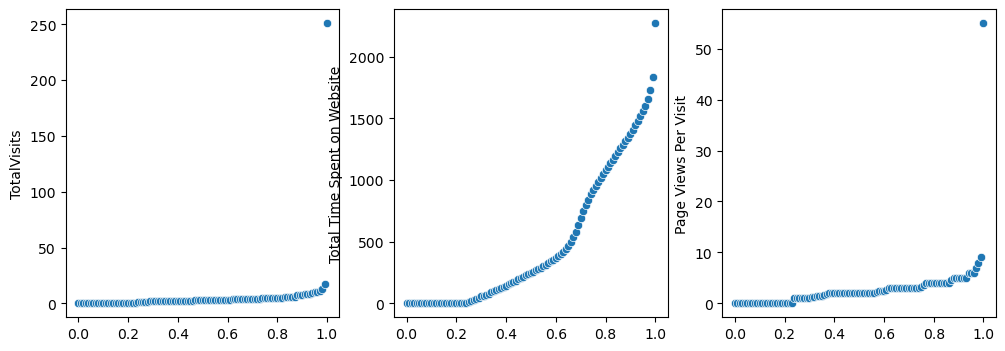

In [31]:
# Make Quantile plot of three column
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(df_4['TotalVisits'].quantile(np.arange(0, 1.01, 0.01)))
plt.subplot(1, 3, 2)
sns.scatterplot(df_4['Total Time Spent on Website'].quantile(np.arange(0, 1.01, 0.01)))
plt.subplot(1, 3, 3)
sns.scatterplot(df_4['Page Views Per Visit'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

In [32]:
quantiles = [0, 0.25, 0.50, 0.75, 0.99, 1.0]  # 0%, 25%, 50%, 75%, 99% and 100% quantiles

# Calculate quantile boundaries
quantile_bounds1 = df_4['TotalVisits'].quantile(quantiles)
quantile_bounds2 = df_4['Total Time Spent on Website'].quantile(quantiles)
quantile_bounds3 = df_4['Page Views Per Visit'].quantile(quantiles)

In [33]:
print(quantile_bounds1)
print(quantile_bounds2)
print(quantile_bounds3)

0.00      0.0
0.25      1.0
0.50      3.0
0.75      5.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64
0.00       0.00
0.25      11.00
0.50     246.00
0.75     922.75
0.99    1839.00
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64
0.00     0.0
0.25     1.0
0.50     2.0
0.75     3.2
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64


In [34]:
# find upper value of all three column
upper_threshold_col1 = df_4['TotalVisits'].quantile(0.99)
upper_threshold_col2 = df_4['Total Time Spent on Website'].quantile(0.99)
upper_threshold_col3 = df_4['Page Views Per Visit'].quantile(0.99)

In [35]:
# Cap values in 'all three column
df_4['TotalVisits'] = df_4['TotalVisits'].clip(upper=upper_threshold_col1)
df_4['Total Time Spent on Website'] = df_4['Total Time Spent on Website'].clip(upper=upper_threshold_col2)
df_4['Page Views Per Visit'] = df_4['Page Views Per Visit'].clip(upper=upper_threshold_col3)

In [36]:
# again Calculate quantile boundaries
quantile_bounds1 = df_4['TotalVisits'].quantile(quantiles)
quantile_bounds2 = df_4['Total Time Spent on Website'].quantile(quantiles)
quantile_bounds3 = df_4['Page Views Per Visit'].quantile(quantiles)

In [37]:
print(quantile_bounds1)
print(quantile_bounds2)
print(quantile_bounds3)

0.00     0.0
0.25     1.0
0.50     3.0
0.75     5.0
0.99    17.0
1.00    17.0
Name: TotalVisits, dtype: float64
0.00       0.00
0.25      11.00
0.50     246.00
0.75     922.75
0.99    1839.00
1.00    1839.00
Name: Total Time Spent on Website, dtype: float64
0.00    0.0
0.25    1.0
0.50    2.0
0.75    3.2
0.99    9.0
1.00    9.0
Name: Page Views Per Visit, dtype: float64


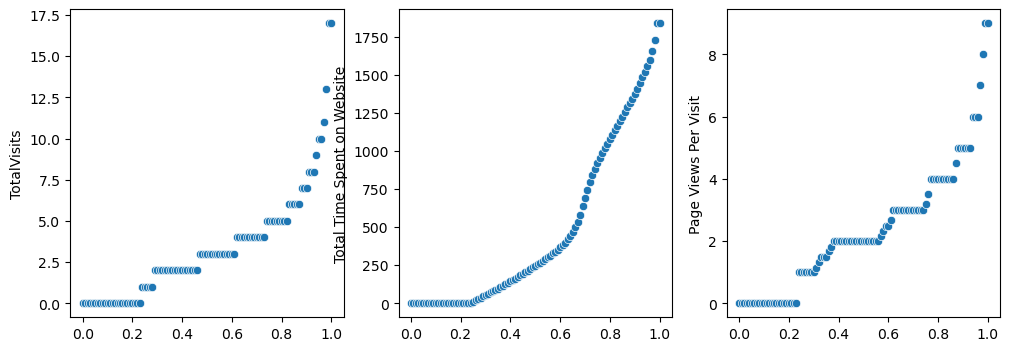

In [38]:
#again check quantile plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(df_4['TotalVisits'].quantile(np.arange(0, 1.01, 0.01)))
plt.subplot(1, 3, 2)
sns.scatterplot(df_4['Total Time Spent on Website'].quantile(np.arange(0, 1.01, 0.01)))
plt.subplot(1, 3, 3)
sns.scatterplot(df_4['Page Views Per Visit'].quantile(np.arange(0, 1.01, 0.01)))
plt.show()

# Scaling, Dummies, Corr, VIF and Rfe

In [39]:
#before train test split create dummy and also scaling the variable

In [40]:
df_4.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [41]:
cat_vars = df_4[['Lead Origin', 'Lead Source', 'Do Not Email', 
       'Last Activity', 'A free copy of Mastering The Interview',
       'Last Notable Activity']]

In [42]:
cat_vars = pd.get_dummies(cat_vars, dtype=int, drop_first=True)

cat_vars

,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Source_BLOG,Lead Source_CLICK2CALL,Lead Source_DIRECT TRAFFIC,Lead Source_FACEBOOK,Lead Source_GOOGLE,Lead Source_LIVE CHAT,Lead Source_NC_EDM,...,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
num_vars = df_4[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [44]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()

In [45]:
num_vars[num_vars.columns] = my_scaler.fit_transform(num_vars)

num_vars

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.000000,0.000000,0.000000
1,0.294118,0.366504,0.277778
2,0.117647,0.833061,0.222222
3,0.058824,0.165851,0.111111
4,0.117647,0.776509,0.111111
...,...,...,...
9235,0.470588,1.000000,0.296667
9236,0.117647,0.129418,0.222222
9237,0.117647,0.108211,0.222222
9238,0.176471,0.271343,0.333333


In [46]:
final_df = pd.concat([cat_vars, num_vars, df_4[ 'Converted']], axis=1)

final_df.head()

,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Source_BLOG,Lead Source_CLICK2CALL,Lead Source_DIRECT TRAFFIC,Lead Source_FACEBOOK,Lead Source_GOOGLE,Lead Source_LIVE CHAT,Lead Source_NC_EDM,...,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.294118,0.366504,0.277778,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.117647,0.833061,0.222222,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.058824,0.165851,0.111111,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.117647,0.776509,0.111111,1


In [47]:
# check the correlation metrics

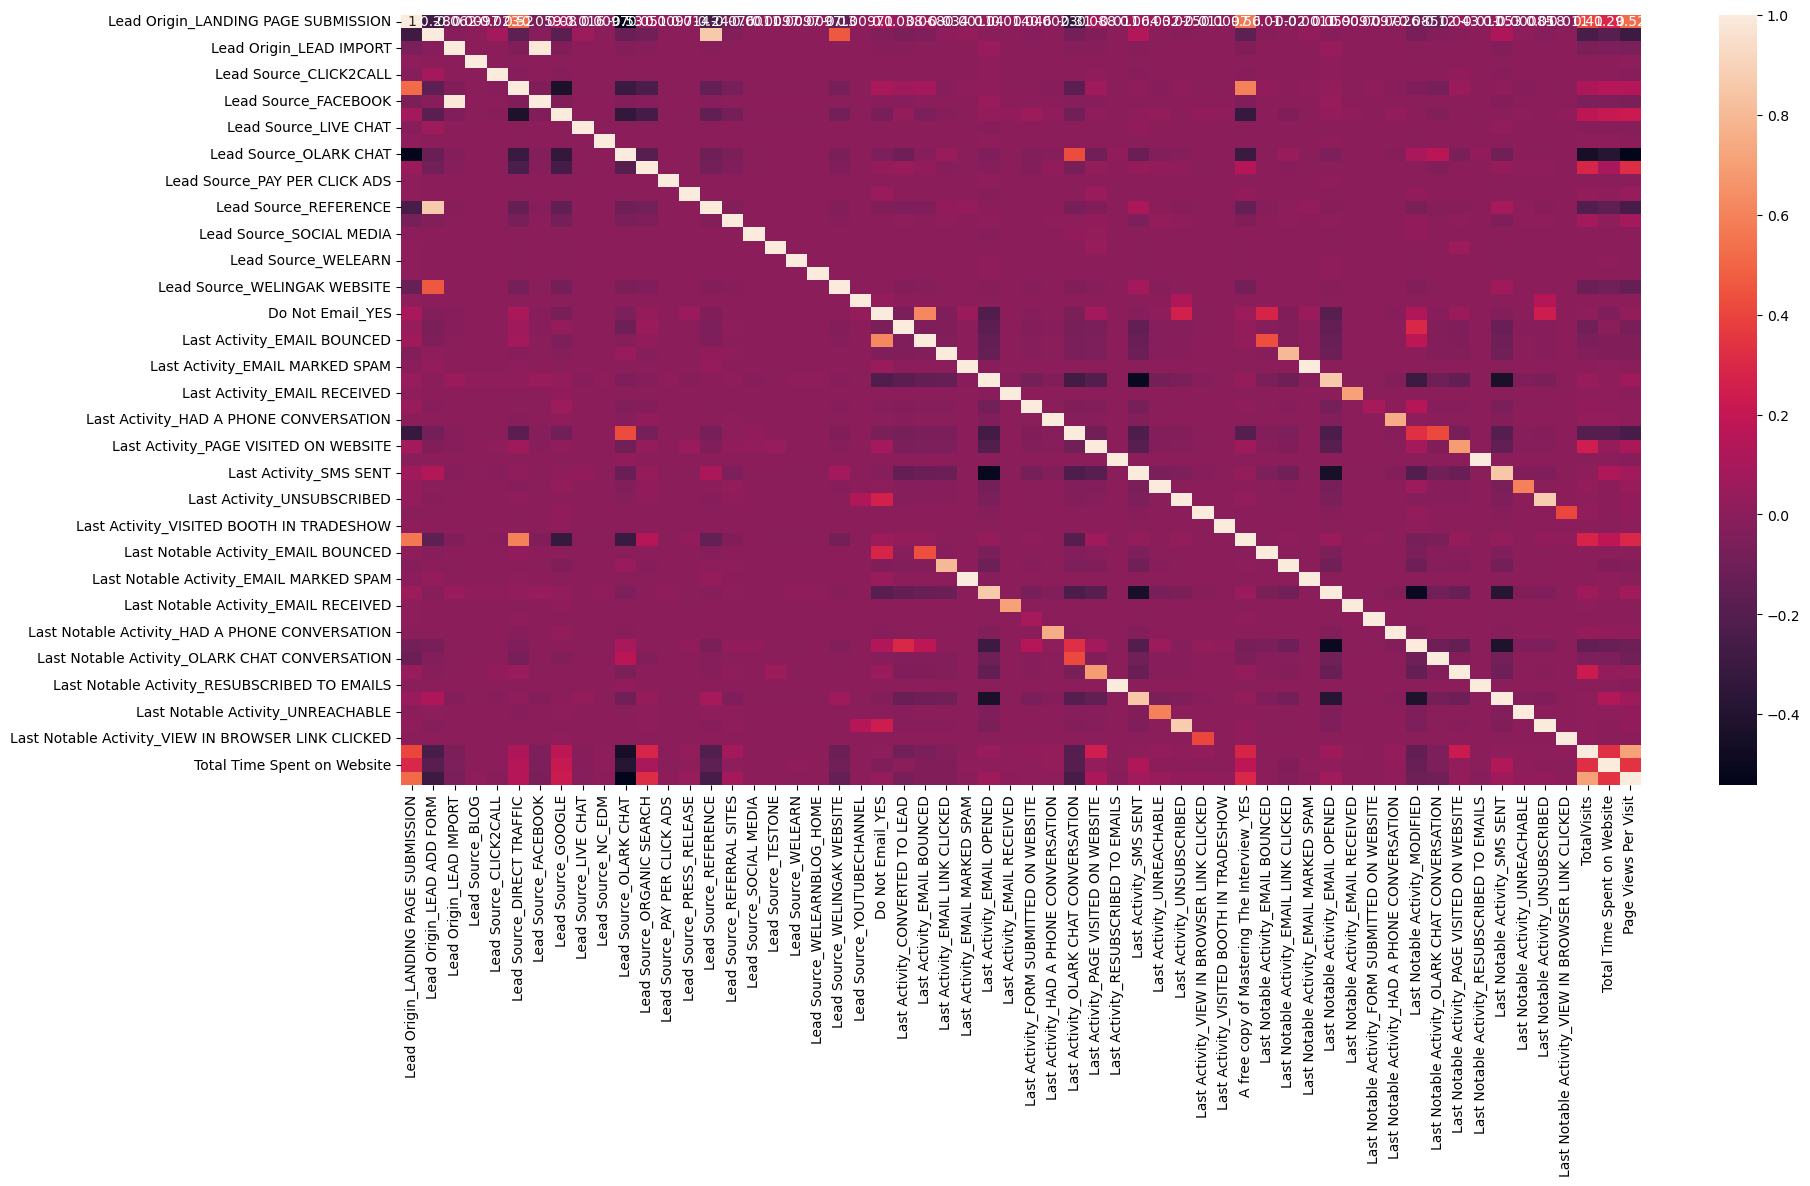

In [48]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(final_df.drop('Converted', axis = 1).corr(),annot = True)
plt.show()

In [49]:
#import the train test split from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split

In [50]:
# Putting feature variable to X
X = final_df.drop(['Converted'], axis=1)

X.head()

,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Source_BLOG,Lead Source_CLICK2CALL,Lead Source_DIRECT TRAFFIC,Lead Source_FACEBOOK,Lead Source_GOOGLE,Lead Source_LIVE CHAT,Lead Source_NC_EDM,...,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.294118,0.366504,0.277778
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.117647,0.833061,0.222222
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.058824,0.165851,0.111111
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.117647,0.776509,0.111111


In [51]:
# Putting response variable to y
y = final_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [52]:
# checking VIF

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
42,Last Notable Activity_EMAIL MARKED SPAM,inf
33,Last Activity_RESUBSCRIBED TO EMAILS,inf
26,Last Activity_EMAIL MARKED SPAM,inf
50,Last Notable Activity_RESUBSCRIBED TO EMAILS,inf
47,Last Notable Activity_MODIFIED,1286.34
43,Last Notable Activity_EMAIL OPENED,1116.65
27,Last Activity_EMAIL OPENED,864.47
51,Last Notable Activity_SMS SENT,852.09
34,Last Activity_SMS SENT,684.68
7,Lead Source_GOOGLE,412.92


In [55]:
# Round VIF values for better readability
vif["VIF"] = vif["VIF"].round(2)

# Identify columns with high VIF scores (typically > 100)
high_vif = vif[vif["VIF"] > 100]

# If you want to drop columns with high VIF scores
columns_to_drop = high_vif["Features"].tolist()
X_reduced = X.drop(columns=columns_to_drop)

X_reduced

,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD IMPORT,Lead Source_BLOG,Lead Source_CLICK2CALL,Lead Source_FACEBOOK,Lead Source_LIVE CHAT,Lead Source_NC_EDM,Lead Source_PAY PER CLICK ADS,Lead Source_PRESS_RELEASE,Lead Source_REFERRAL SITES,...,Last Notable Activity_EMAIL RECEIVED,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.294118,0.366504,0.277778
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.117647,0.833061,0.222222
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.058824,0.165851,0.111111
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.117647,0.776509,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.470588,1.000000,0.296667
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.117647,0.129418,0.222222
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.117647,0.108211,0.222222
9238,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.176471,0.271343,0.333333


In [56]:
vif = pd.DataFrame()
vif['Features'] = X_reduced.columns
vif['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_LEAD IMPORT,31.02
4,Lead Source_FACEBOOK,31.02
38,Page Views Per Visit,5.37
23,Last Activity_UNSUBSCRIBED,4.32
34,Last Notable Activity_UNSUBSCRIBED,4.25
36,TotalVisits,4.22
0,Lead Origin_LANDING PAGE SUBMISSION,4.05
18,Last Activity_EMAIL LINK CLICKED,2.85
28,Last Notable Activity_EMAIL LINK CLICKED,2.85
31,Last Notable Activity_HAD A PHONE CONVERSATION,2.28


In [57]:
# Round VIF values for better readability
vif["VIF"] = vif["VIF"].round(2)

# Identify columns with high VIF scores (typically > 10)
high_vif = vif[vif["VIF"] > 10]

# If you want to drop columns with high VIF scores
columns_to_drop = high_vif["Features"].tolist()
X_final = X_reduced.drop(columns=columns_to_drop)

X_final

,Lead Origin_LANDING PAGE SUBMISSION,Lead Source_BLOG,Lead Source_CLICK2CALL,Lead Source_LIVE CHAT,Lead Source_NC_EDM,Lead Source_PAY PER CLICK ADS,Lead Source_PRESS_RELEASE,Lead Source_REFERRAL SITES,Lead Source_SOCIAL MEDIA,Lead Source_TESTONE,...,Last Notable Activity_EMAIL RECEIVED,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.294118,0.366504,0.277778
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.117647,0.833061,0.222222
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.058824,0.165851,0.111111
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.117647,0.776509,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.470588,1.000000,0.296667
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.117647,0.129418,0.222222
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.117647,0.108211,0.222222
9238,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.176471,0.271343,0.333333


In [58]:
vif = pd.DataFrame()
vif['Features'] = X_final.columns
vif['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
36,Page Views Per Visit,5.36
21,Last Activity_UNSUBSCRIBED,4.32
32,Last Notable Activity_UNSUBSCRIBED,4.25
34,TotalVisits,4.22
0,Lead Origin_LANDING PAGE SUBMISSION,4.05
16,Last Activity_EMAIL LINK CLICKED,2.85
26,Last Notable Activity_EMAIL LINK CLICKED,2.85
29,Last Notable Activity_HAD A PHONE CONVERSATION,2.28
19,Last Activity_HAD A PHONE CONVERSATION,2.28
24,A free copy of Mastering The Interview_YES,2.18


In [59]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Initialize RFE with the model and the number of features you want (20 in this case)
rfe = RFE(estimator=model, n_features_to_select=20)

# Fit RFE on the training data
rfe.fit(X_final, y)

# Get the mask of selected features
selected_columns = X_final.columns[rfe.support_]

print("Selected Features by RFE:")
print(selected_columns)

# Create a reduced DataFrame with only the selected features
X_final_reduced = X_final[selected_columns]

print("\nReduced DataFrame with Top 20 Features:")
X_final_reduced

Selected Features by RFE:
Index(['Lead Origin_LANDING PAGE SUBMISSION', 'Lead Source_CLICK2CALL',
       'Lead Source_LIVE CHAT', 'Lead Source_REFERRAL SITES',
       'Lead Source_WELINGAK WEBSITE', 'Do Not Email_YES',
       'Last Activity_EMAIL BOUNCED', 'Last Activity_EMAIL LINK CLICKED',
       'Last Activity_EMAIL RECEIVED',
       'Last Activity_FORM SUBMITTED ON WEBSITE',
       'Last Activity_HAD A PHONE CONVERSATION', 'Last Activity_UNREACHABLE',
       'Last Activity_VIEW IN BROWSER LINK CLICKED',
       'Last Notable Activity_EMAIL BOUNCED',
       'Last Notable Activity_HAD A PHONE CONVERSATION',
       'Last Notable Activity_OLARK CHAT CONVERSATION',
       'Last Notable Activity_UNREACHABLE', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

Reduced DataFrame with Top 20 Features:


,Lead Origin_LANDING PAGE SUBMISSION,Lead Source_CLICK2CALL,Lead Source_LIVE CHAT,Lead Source_REFERRAL SITES,Lead Source_WELINGAK WEBSITE,Do Not Email_YES,Last Activity_EMAIL BOUNCED,Last Activity_EMAIL LINK CLICKED,Last Activity_EMAIL RECEIVED,Last Activity_FORM SUBMITTED ON WEBSITE,Last Activity_HAD A PHONE CONVERSATION,Last Activity_UNREACHABLE,Last Activity_VIEW IN BROWSER LINK CLICKED,Last Notable Activity_EMAIL BOUNCED,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_UNREACHABLE,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.294118,0.366504,0.277778
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.117647,0.833061,0.222222
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.058824,0.165851,0.111111
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.117647,0.776509,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.470588,1.000000,0.296667
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.117647,0.129418,0.222222
9237,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.117647,0.108211,0.222222
9238,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.176471,0.271343,0.333333


# Train test Split 

In [60]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_final_reduced, y, train_size=0.75, test_size=0.25, random_state=42)

In [61]:
logreg = LogisticRegression()

In [62]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [64]:
# Getting the predicted values on the train set
y_train_pred = logreg.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
y_train_pred_final = pd.DataFrame({'actual':y_train.values, 'predicted':y_train_pred})

y_train_pred_final.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.actual, y_train_pred_final.predicted )
print(confusion)

[[3714  520]
 [1268 1303]]


In [67]:
print(metrics.accuracy_score(y_train_pred_final.actual, y_train_pred_final.predicted))

0.737252020573108


In [68]:
report = classification_report(y_train, y_train_pred)

In [69]:
print(report)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      4234
           1       0.71      0.51      0.59      2571

    accuracy                           0.74      6805
   macro avg       0.73      0.69      0.70      6805
weighted avg       0.73      0.74      0.73      6805



In [70]:
# Getting the predicted values on the train set
y_test_pred = logreg.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
y_test_pred_final = pd.DataFrame({'actual':y_test.values, 'predicted':y_test_pred})

y_test_pred_final.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# Check Confusion Metrics and Accurace Score of prediction

In [72]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.actual, y_test_pred_final.predicted )
print(confusion)

[[1253  152]
 [ 447  417]]


In [73]:
print(metrics.accuracy_score(y_test_pred_final.actual, y_test_pred_final.predicted))

0.7360070515645659


In [74]:
report = classification_report(y_test, y_test_pred)

In [75]:
print(report)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1405
           1       0.73      0.48      0.58       864

    accuracy                           0.74      2269
   macro avg       0.73      0.69      0.69      2269
weighted avg       0.74      0.74      0.72      2269



# Check Cofficient Factor of model

In [76]:
coefficients = logreg.coef_[0]

# Create a DataFrame for easy visualization of feature importance
features = X_train.columns  # Assuming X is a pandas DataFrame, otherwise use feature names
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by the absolute value of coefficients to rank feature importance
importance_df['Absolute Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the sorted feature importance
print(importance_df[['Feature', 'Coefficient']])

                                           Feature  Coefficient
4                     Lead Source_WELINGAK WEBSITE     3.863010
18                     Total Time Spent on Website     3.204829
6                      Last Activity_EMAIL BOUNCED    -1.998970
16               Last Notable Activity_UNREACHABLE     1.907414
15   Last Notable Activity_OLARK CHAT CONVERSATION    -1.336522
14  Last Notable Activity_HAD A PHONE CONVERSATION     1.019412
13             Last Notable Activity_EMAIL BOUNCED     0.967999
19                            Page Views Per Visit    -0.956506
3                       Lead Source_REFERRAL SITES    -0.922806
5                                 Do Not Email_YES    -0.861700
9          Last Activity_FORM SUBMITTED ON WEBSITE    -0.842680
11                       Last Activity_UNREACHABLE    -0.759938
10          Last Activity_HAD A PHONE CONVERSATION     0.691908
0              Lead Origin_LANDING PAGE SUBMISSION    -0.578554
2                            Lead Source